<a href="https://colab.research.google.com/github/dorin133/Signal-Processing-236201-all-HW/blob/master/HW3-236201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries 
import matplotlib.pyplot as plt
import imageio
import math
import os
import cv2
import numpy as np
from skimage import io, color
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from google.colab.patches import cv2_imshow
from matplotlib.pyplot import figure
from scipy.linalg import dft
from numpy.linalg import matrix_rank
import numpy.linalg
import librosa
import soundfile

In [ ]:
#Load the mandril original image
image_orig = io.imread("mandril_original.png")
mandril_image_orig = color.rgb2gray(image_orig)
mandril_orig = np.array(mandril_image_orig, dtype=np.uint)
h, w= mandril_orig.shape
mandril_orig_arr = np.reshape(mandril_orig, (w*h))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Load the mandril distorted image
image_distorted = io.imread("mandril_distorted.png")
mandril_gray_distorted = color.rgb2gray(image_distorted)
mandril_distorted = np.array(mandril_gray_distorted, dtype=np.uint)
h, w= mandril_distorted.shape
mandril_distorted_arr = np.reshape(mandril_distorted, (w*h))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Load the butterfly image
image_butterfly = io.imread("Butterfly_.png")
butterfly_gray = color.rgb2gray(image_butterfly)
butterfly = np.array(butterfly_gray, dtype=np.uint)
h, w= butterfly.shape
butterfly_arr = np.reshape(butterfly, (w*h))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until


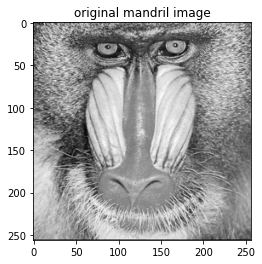

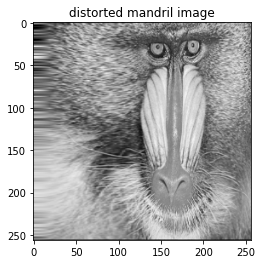

In [ ]:
#normalizing the images:
mandril_orig = mandril_orig / 255
mandril_distorted = mandril_distorted / 255
butterfly = butterfly / 255

plt.imshow(mandril_orig, cmap='gray', vmin=mandril_orig.min(), vmax=mandril_orig.max())
plt.title("original mandril image")
plt.show()

plt.imshow(mandril_distorted, cmap='gray', vmin=mandril_distorted.min(), vmax=mandril_distorted.max())
plt.title("distorted mandril image")
plt.show()

In [ ]:
n = mandril_orig.shape[0]

# 1.a. calculating the coefficients of the mandrill images
DFT_mat = dft(n)/np.sqrt(n)
# dividing the inverse DFT by n since the negative power multplies the matrix by sqrt(n)
invDFT_mat = (DFT_mat**-1)/n

mandril_orig_coe = mandril_orig @ DFT_mat
mandril_distorted_coe = mandril_distorted @ DFT_mat

In [ ]:
#1.b. - showing that matrix A is of full rank
print(matrix_rank(mandril_orig_coe))


# since a is of full rank: A inverse is equivalent to A pseudo-inverse B=AC => (A^-1)B=C
# 1.b. - computing the function map matrix
C_func_map = np.linalg.inv(mandril_orig_coe) @ mandril_distorted_coe

256


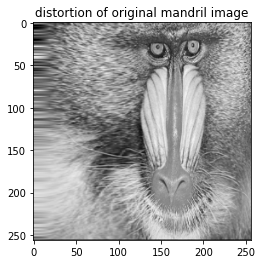

In [ ]:
# 1.c. - distorting the original image
mandril_orig_distorted_coe = mandril_orig_coe @ C_func_map
mandril_orig_distorted = mandril_orig_distorted_coe @ invDFT_mat

# we're assering that the given image holds only real values up to numerical errors
#  our tolerance is: 2.22*1e-10 
mandril_orig_distorted = np.real_if_close(mandril_orig_distorted, tol=1e+6)
#print(mandril_orig_distorted)

plt.imshow(mandril_orig_distorted, cmap='gray', vmin=mandril_orig_distorted.min(), vmax=mandril_orig_distorted.max())
plt.title("distortion of original mandril image")
plt.show()

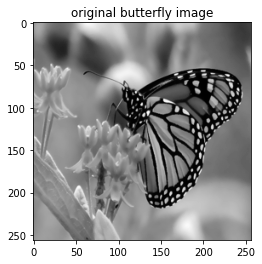

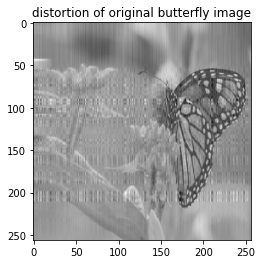

In [ ]:
# printing the butterfly image pre-distortion
plt.imshow(butterfly, cmap='gray', vmin=butterfly.min(), vmax=butterfly.max())
plt.title("original butterfly image")
plt.show()

# 1.d. - distorting the butterfly image
butterfly_distorted = ((butterfly @ DFT_mat) @ C_func_map) @ invDFT_mat
butterfly_distorted = np.real_if_close(butterfly_distorted, tol=1e+6)

plt.imshow(butterfly_distorted, cmap='gray', vmin=butterfly_distorted.min(), vmax=butterfly_distorted.max())
plt.title("distortion of original butterfly image")
plt.show()

In [ ]:
#Q2
skycastle_orig, orig_rate = librosa.load('skycastle.wav', sr=48000)
skycastle_distort, distort_rate = librosa.load('skycastle-distortion.wav', sr=48000)
skycastle_orig_mat=np.reshape(skycastle_orig, (-1,512))
skycastle_distort_mat=np.reshape(skycastle_distort, (-1,512))
N=skycastle_orig_mat.shape[1]
DFT_mat2=dft(N)/np.sqrt(N)
invDFT_mat2 = (DFT_mat2**-1)/N

In [ ]:
#compute the dft coefficients of the original and distorted signals
skycastle_orig_coe = skycastle_orig_mat @ DFT_mat2
skycastle_distort_coe = skycastle_distort_mat @ DFT_mat2
#showing that our distorted coefficients matrix is of full rank
print(matrix_rank(skycastle_distort_coe))
#we want to find the functional map that fixes the distorted signal so we pseudo invert the distorted signal
fix_distort_func_map = np.linalg.pinv(skycastle_distort_coe) @ skycastle_orig_coe

512


In [ ]:
undistorted_mat = (skycastle_distort_coe@fix_distort_func_map)@invDFT_mat2
undistorted_mat = np.real_if_close(undistorted_mat, tol=1e+6)
undistorted_signal = np.reshape(undistorted_mat,(-1))
soundfile.write('undistorted.wav', undistorted_signal, 48000)

In [ ]:
totoro_distort, distort_rate = librosa.load('totoro-distortion.wav', sr=48000)
totoro_distort_mat=np.reshape(totoro_distort, (-1,512))
totoro_undistorted = np.real_if_close(totoro_distort_mat@DFT_mat2@fix_distort_func_map@invDFT_mat2, tol=1e+6)
totoro_undistorted = np.reshape(totoro_undistorted,(-1))
totoro_orig, totoro_orig_rate=librosa.load('totoro.wav', sr=48000)
mse=np.mean((totoro_undistorted-totoro_orig)**2)
print("The MSE of undistorting the totoro signal is: ", mse)

The MSE of undistorting the totoro signal is:  2.3605735108463757e-09


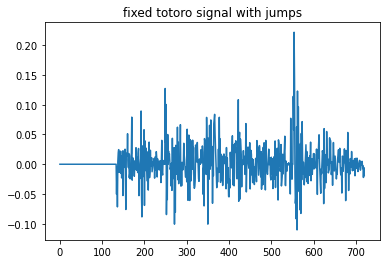

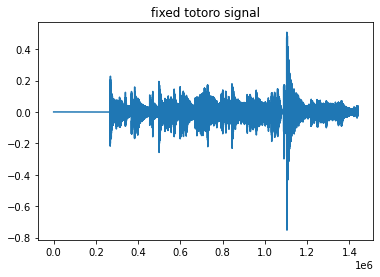

In [ ]:
#plotting both original and fixed signal on graphs
plt.plot(totoro_undistorted[::2000])
plt.title("fixed totoro signal with jumps")
plt.show()
plt.plot(totoro_undistorted)
plt.title("fixed totoro signal")
plt.show()

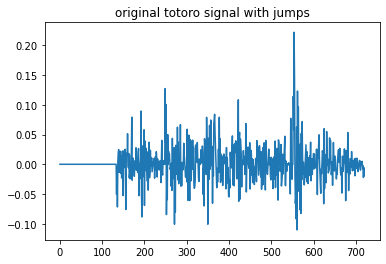

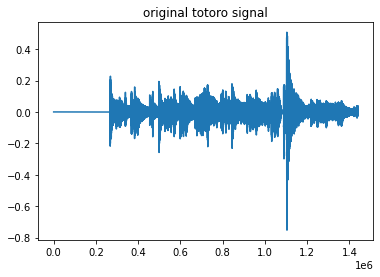

In [ ]:
plt.plot(totoro_orig[::2000], label = 'original signal')
plt.title("original totoro signal with jumps")
plt.show()
plt.plot(totoro_orig, label = 'original signal')
plt.title("original totoro signal")
plt.show()

In [ ]:
soundfile.write('totoro_undistorted.wav', totoro_undistorted, 48000)